# Problem statement

##### Extract reviews of any product from ecommerce website like amazon and perform emotion mining.

##### We will use the reviews data extracted from the https://jmcauley.ucsd.edu/data/amazon/ link. We will use Musical Instruments reviews as other files are very big in size.

# Importing the libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline
import pandas

# Loading the dataset

##### The file is in json format so we will read the json file using pandas and convert into dataframe

In [2]:
reviews = pd.read_json(r"Musical_Instruments_5.json",lines=True)

In [3]:
reviews.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5,No more pops when I record my vocals.,1392940800,"02 21, 2014"


# Data Insights

In [4]:
reviews.shape

(10261, 9)

In [5]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10261 entries, 0 to 10260
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   reviewerID      10261 non-null  object
 1   asin            10261 non-null  object
 2   reviewerName    10234 non-null  object
 3   helpful         10261 non-null  object
 4   reviewText      10261 non-null  object
 5   overall         10261 non-null  int64 
 6   summary         10261 non-null  object
 7   unixReviewTime  10261 non-null  int64 
 8   reviewTime      10261 non-null  object
dtypes: int64(2), object(7)
memory usage: 721.6+ KB


### Observations :-

1. We could see that there are total 10,261 reviews data and there are 9 attributes(columns) in our dataset

2. We have few null values in the reviewerName as the count of the reviewerName column is lesser than other columns

# Checking for null values 

In [6]:
reviews.isnull().sum()

reviewerID         0
asin               0
reviewerName      27
helpful            0
reviewText         0
overall            0
summary            0
unixReviewTime     0
reviewTime         0
dtype: int64

##### We could see there are 27 null values in reviewerName column. We will drop these values from our dataframe

In [7]:
reviews.dropna(axis=0,inplace=True)

In [8]:
reviews.isnull().sum()

reviewerID        0
asin              0
reviewerName      0
helpful           0
reviewText        0
overall           0
summary           0
unixReviewTime    0
reviewTime        0
dtype: int64

In [9]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10234 entries, 0 to 10260
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   reviewerID      10234 non-null  object
 1   asin            10234 non-null  object
 2   reviewerName    10234 non-null  object
 3   helpful         10234 non-null  object
 4   reviewText      10234 non-null  object
 5   overall         10234 non-null  int64 
 6   summary         10234 non-null  object
 7   unixReviewTime  10234 non-null  int64 
 8   reviewTime      10234 non-null  object
dtypes: int64(2), object(7)
memory usage: 799.5+ KB


##### After dropping we could see there are null values in our dataset

# Insights on Rating value for products

In [10]:
reviews['overall'].value_counts()

5    6918
4    2080
3     771
2     249
1     216
Name: overall, dtype: int64

##### We could see most of the rating values are 5. There are 6918 observations with 5 ratings 

In [11]:
reviews['overall'].describe()

count    10234.000000
mean         4.488665
std          0.894361
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: overall, dtype: float64

C:\Users\91982\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='overall'>

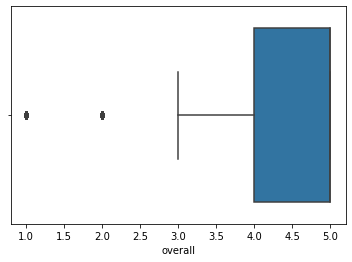

In [12]:
import seaborn as sn
sn.boxplot(reviews['overall'])

C:\Users\91982\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='overall', ylabel='Density'>

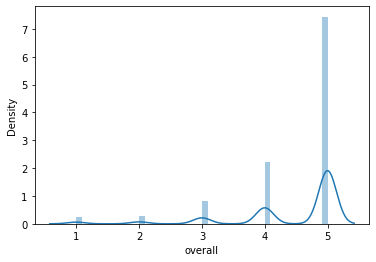

In [13]:
sn.distplot(reviews['overall'])

##### From the above plots also we can see there are very few counts of ratings less than 4. The above distplot shows the ratings are very highly negatively skewed

# Using TextBlob to genereate subjectivity and polarity on review text

In [14]:
from textblob import TextBlob

def sentiment_analysis(ds):
    sentiment = TextBlob(ds["reviewText"]).sentiment
    return pd.Series([sentiment.subjectivity, sentiment.polarity])
# Adding Subjectivity & Polarity
reviews[["subjectivity", "polarity"]] = reviews.apply(sentiment_analysis, axis=1)
reviews

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,subjectivity,polarity
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5,good,1393545600,"02 28, 2014",0.398611,0.250000
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5,Jake,1363392000,"03 16, 2013",0.394444,0.052778
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5,It Does The Job Well,1377648000,"08 28, 2013",0.434286,0.167500
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014",0.925000,0.200000
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5,No more pops when I record my vocals.,1392940800,"02 21, 2014",0.750000,0.800000
...,...,...,...,...,...,...,...,...,...,...,...
10256,A14B2YH83ZXMPP,B00JBIVXGC,Lonnie M. Adams,"[0, 0]","Great, just as expected. Thank to all.",5,Five Stars,1405814400,"07 20, 2014",0.575000,0.350000
10257,A1RPTVW5VEOSI,B00JBIVXGC,Michael J. Edelman,"[0, 0]",I've been thinking about trying the Nanoweb st...,5,"Long life, and for some players, a good econom...",1404259200,"07 2, 2014",0.464348,0.188033
10258,AWCJ12KBO5VII,B00JBIVXGC,Michael L. Knapp,"[0, 0]",I have tried coated strings in the past ( incl...,4,Good for coated.,1405987200,"07 22, 2014",0.401459,0.197768
10259,A2Z7S8B5U4PAKJ,B00JBIVXGC,"Rick Langdon ""Scriptor""","[0, 0]","Well, MADE by Elixir and DEVELOPED with Taylor...",4,Taylor Made,1404172800,"07 1, 2014",0.535669,0.153843


# Using TextBlob to genereate subjectivity and polarity on review summary

In [15]:
from textblob import TextBlob

def sentiment_analysis(ds):
    sentiment = TextBlob(ds["summary"]).sentiment
    return pd.Series([sentiment.subjectivity, sentiment.polarity])
# Adding Subjectivity & Polarity
reviews[["subjectivity_summary", "polarity_summary"]] = reviews.apply(sentiment_analysis, axis=1)
reviews

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,subjectivity,polarity,subjectivity_summary,polarity_summary
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5,good,1393545600,"02 28, 2014",0.398611,0.250000,0.6,0.700000
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5,Jake,1363392000,"03 16, 2013",0.394444,0.052778,0.0,0.000000
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5,It Does The Job Well,1377648000,"08 28, 2013",0.434286,0.167500,0.0,0.000000
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014",0.925000,0.200000,0.6,0.700000
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5,No more pops when I record my vocals.,1392940800,"02 21, 2014",0.750000,0.800000,0.5,-0.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10256,A14B2YH83ZXMPP,B00JBIVXGC,Lonnie M. Adams,"[0, 0]","Great, just as expected. Thank to all.",5,Five Stars,1405814400,"07 20, 2014",0.575000,0.350000,0.0,0.000000
10257,A1RPTVW5VEOSI,B00JBIVXGC,Michael J. Edelman,"[0, 0]",I've been thinking about trying the Nanoweb st...,5,"Long life, and for some players, a good econom...",1404259200,"07 2, 2014",0.464348,0.188033,0.4,0.283333
10258,AWCJ12KBO5VII,B00JBIVXGC,Michael L. Knapp,"[0, 0]",I have tried coated strings in the past ( incl...,4,Good for coated.,1405987200,"07 22, 2014",0.401459,0.197768,0.6,0.700000
10259,A2Z7S8B5U4PAKJ,B00JBIVXGC,"Rick Langdon ""Scriptor""","[0, 0]","Well, MADE by Elixir and DEVELOPED with Taylor...",4,Taylor Made,1404172800,"07 1, 2014",0.535669,0.153843,0.0,0.000000


##### Polarity is float which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement. Subjective sentences generally refer to personal opinion, emotion or judgment whereas objective refers to factual information. Subjectivity is also a float which lies in the range of [0,1].

# Plotting wordcloud on reviews

##### Wordcloud is very effective technique to understand the most relevant and frequent words. We can check which words are most frequently occuring words in the Amazon reviews 

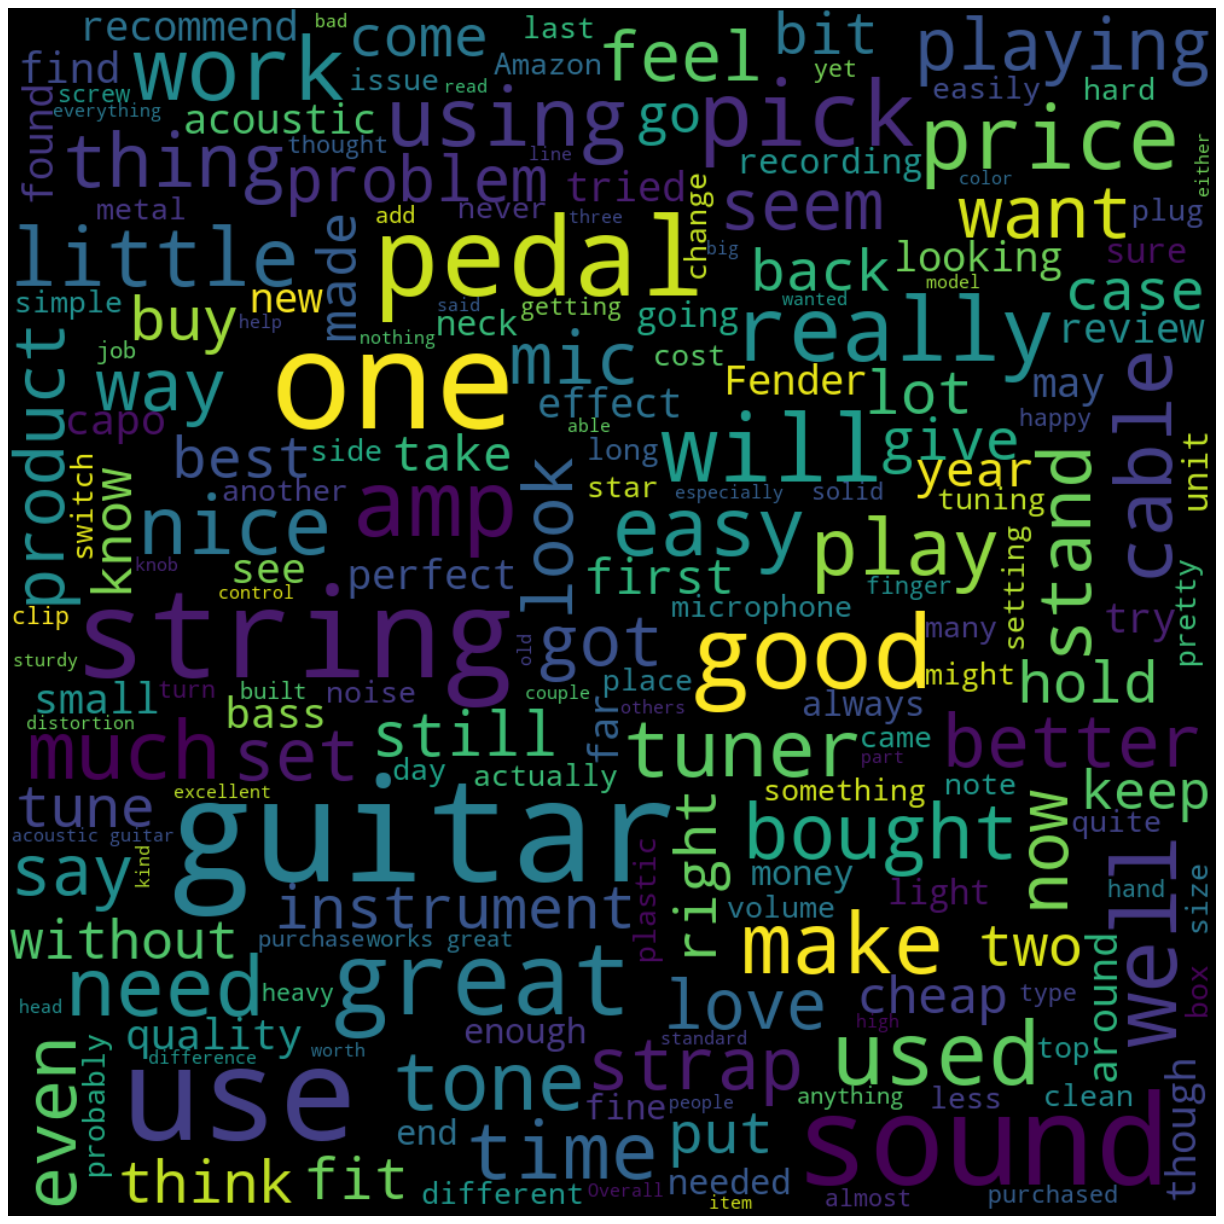

In [16]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
allwords = " ".join([rev for rev in reviews["reviewText"]])
wordCloud = WordCloud(width = 1000, height = 1000, random_state = 21, max_font_size = 119).generate(allwords)
plt.figure(figsize=(20, 20), dpi=80)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis("off")
plt.show()


##### As the reviews are for Musical instruments, in the above word cloud we can words related to music. The most repetitive words are guitar, string, sound, tone, tuner, instrument, etc

# Plotting wordcloud on reviews summary

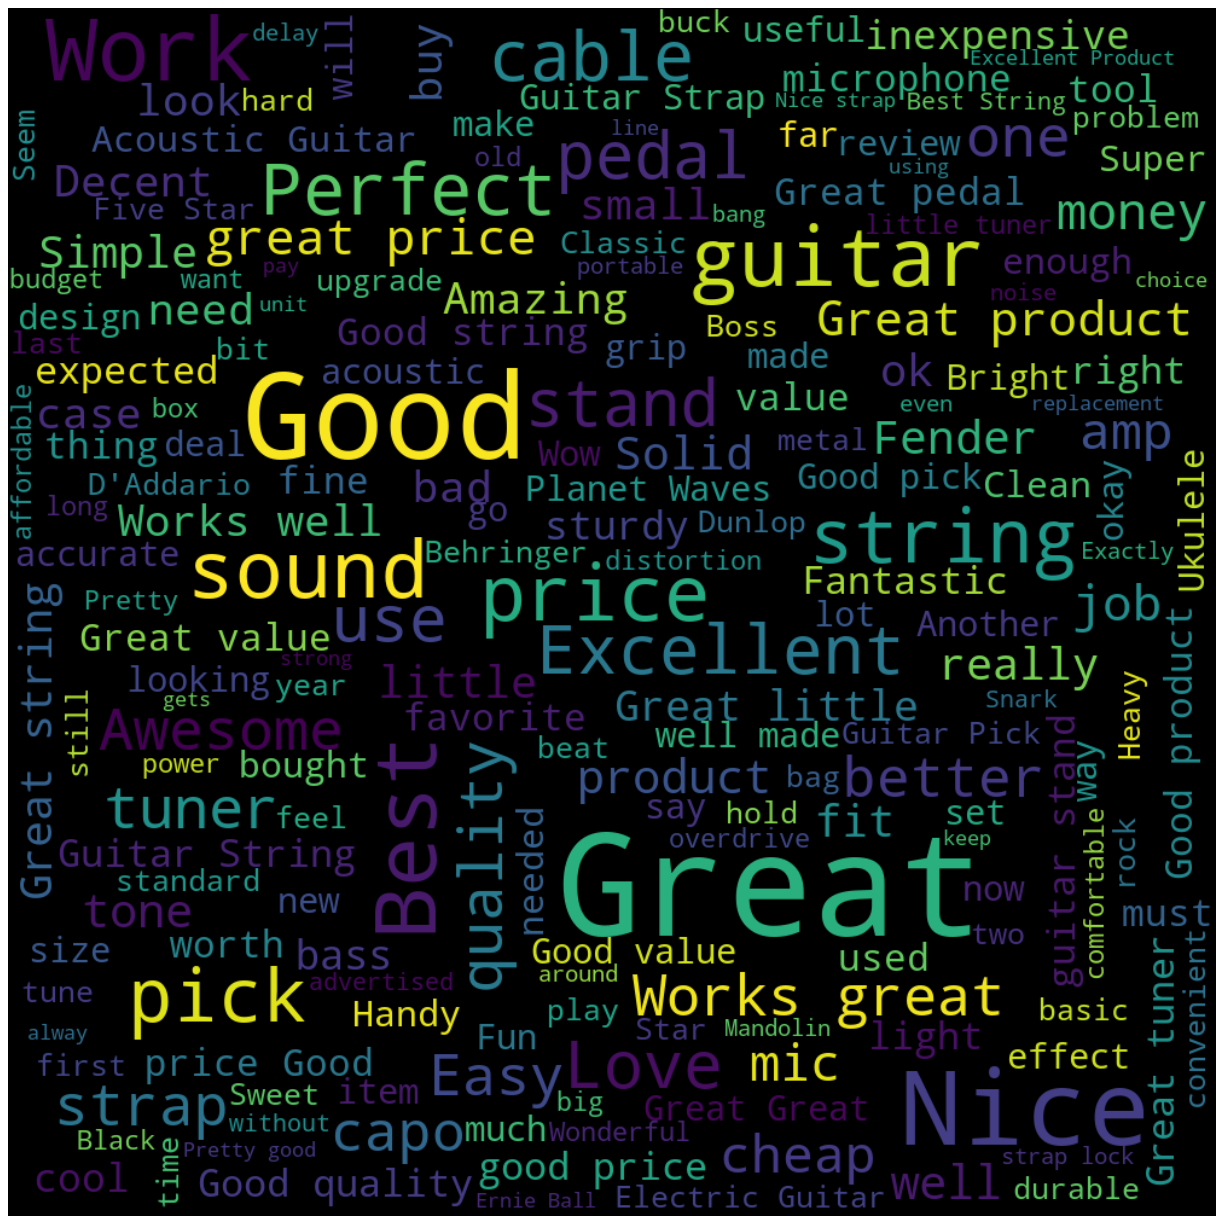

In [17]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
allwords = " ".join([rev for rev in reviews["summary"]])
wordCloud = WordCloud(width = 1000, height = 1000, random_state = 21, max_font_size = 119).generate(allwords)
plt.figure(figsize=(20, 20), dpi=80)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis("off")
plt.show()


##### In the review summary we see that the most repetitive words are Good, Great, Great product, Excellent, Nice, Perfect,sound, Price, etc. So we can see that the most of the review summary are showing very positive words which means the buyers are happy with the product

# Emotion mining on review text

In [18]:
def analysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
# Create a New Analysis Column
reviews["analysis"] = reviews["polarity"].apply(analysis)
# Print The Data
reviews

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,subjectivity,polarity,subjectivity_summary,polarity_summary,analysis
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5,good,1393545600,"02 28, 2014",0.398611,0.250000,0.6,0.700000,Positive
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5,Jake,1363392000,"03 16, 2013",0.394444,0.052778,0.0,0.000000,Positive
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5,It Does The Job Well,1377648000,"08 28, 2013",0.434286,0.167500,0.0,0.000000,Positive
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014",0.925000,0.200000,0.6,0.700000,Positive
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5,No more pops when I record my vocals.,1392940800,"02 21, 2014",0.750000,0.800000,0.5,-0.250000,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10256,A14B2YH83ZXMPP,B00JBIVXGC,Lonnie M. Adams,"[0, 0]","Great, just as expected. Thank to all.",5,Five Stars,1405814400,"07 20, 2014",0.575000,0.350000,0.0,0.000000,Positive
10257,A1RPTVW5VEOSI,B00JBIVXGC,Michael J. Edelman,"[0, 0]",I've been thinking about trying the Nanoweb st...,5,"Long life, and for some players, a good econom...",1404259200,"07 2, 2014",0.464348,0.188033,0.4,0.283333,Positive
10258,AWCJ12KBO5VII,B00JBIVXGC,Michael L. Knapp,"[0, 0]",I have tried coated strings in the past ( incl...,4,Good for coated.,1405987200,"07 22, 2014",0.401459,0.197768,0.6,0.700000,Positive
10259,A2Z7S8B5U4PAKJ,B00JBIVXGC,"Rick Langdon ""Scriptor""","[0, 0]","Well, MADE by Elixir and DEVELOPED with Taylor...",4,Taylor Made,1404172800,"07 1, 2014",0.535669,0.153843,0.0,0.000000,Positive


# Emotion mining on summary text

In [19]:
def analysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
# Create a New Analysis Column
reviews["analysis_summary"] = reviews["polarity_summary"].apply(analysis)
# Print The Data
reviews

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,subjectivity,polarity,subjectivity_summary,polarity_summary,analysis,analysis_summary
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5,good,1393545600,"02 28, 2014",0.398611,0.250000,0.6,0.700000,Positive,Positive
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5,Jake,1363392000,"03 16, 2013",0.394444,0.052778,0.0,0.000000,Positive,Neutral
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5,It Does The Job Well,1377648000,"08 28, 2013",0.434286,0.167500,0.0,0.000000,Positive,Neutral
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014",0.925000,0.200000,0.6,0.700000,Positive,Positive
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5,No more pops when I record my vocals.,1392940800,"02 21, 2014",0.750000,0.800000,0.5,-0.250000,Positive,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10256,A14B2YH83ZXMPP,B00JBIVXGC,Lonnie M. Adams,"[0, 0]","Great, just as expected. Thank to all.",5,Five Stars,1405814400,"07 20, 2014",0.575000,0.350000,0.0,0.000000,Positive,Neutral
10257,A1RPTVW5VEOSI,B00JBIVXGC,Michael J. Edelman,"[0, 0]",I've been thinking about trying the Nanoweb st...,5,"Long life, and for some players, a good econom...",1404259200,"07 2, 2014",0.464348,0.188033,0.4,0.283333,Positive,Positive
10258,AWCJ12KBO5VII,B00JBIVXGC,Michael L. Knapp,"[0, 0]",I have tried coated strings in the past ( incl...,4,Good for coated.,1405987200,"07 22, 2014",0.401459,0.197768,0.6,0.700000,Positive,Positive
10259,A2Z7S8B5U4PAKJ,B00JBIVXGC,"Rick Langdon ""Scriptor""","[0, 0]","Well, MADE by Elixir and DEVELOPED with Taylor...",4,Taylor Made,1404172800,"07 1, 2014",0.535669,0.153843,0.0,0.000000,Positive,Neutral


## TF-IDF vectorizer

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_n_gram_max_features = TfidfVectorizer(norm="l2",analyzer='word', ngram_range=(1,3), max_features = 500)
tf_idf_matrix_n_gram_max_features =vectorizer_n_gram_max_features.fit_transform(reviews)
print(vectorizer_n_gram_max_features.get_feature_names())
print(tf_idf_matrix_n_gram_max_features.toarray())

['analysis', 'analysis_summary', 'asin', 'helpful', 'overall', 'polarity', 'polarity_summary', 'reviewerid', 'reviewername', 'reviewtext', 'reviewtime', 'subjectivity', 'subjectivity_summary', 'summary', 'unixreviewtime']
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [21]:
reviews["analysis"].value_counts()

Positive    9379
Negative     672
Neutral      183
Name: analysis, dtype: int64

In [22]:
reviews["analysis_summary"].value_counts()

Positive    6709
Neutral     2969
Negative     556
Name: analysis_summary, dtype: int64

##### We could see that more than 50% of the reviews and review summary are positive which means customers are happy with the products brought from Amazon